# Alignment tolerance

In [1]:
from __future__ import print_function

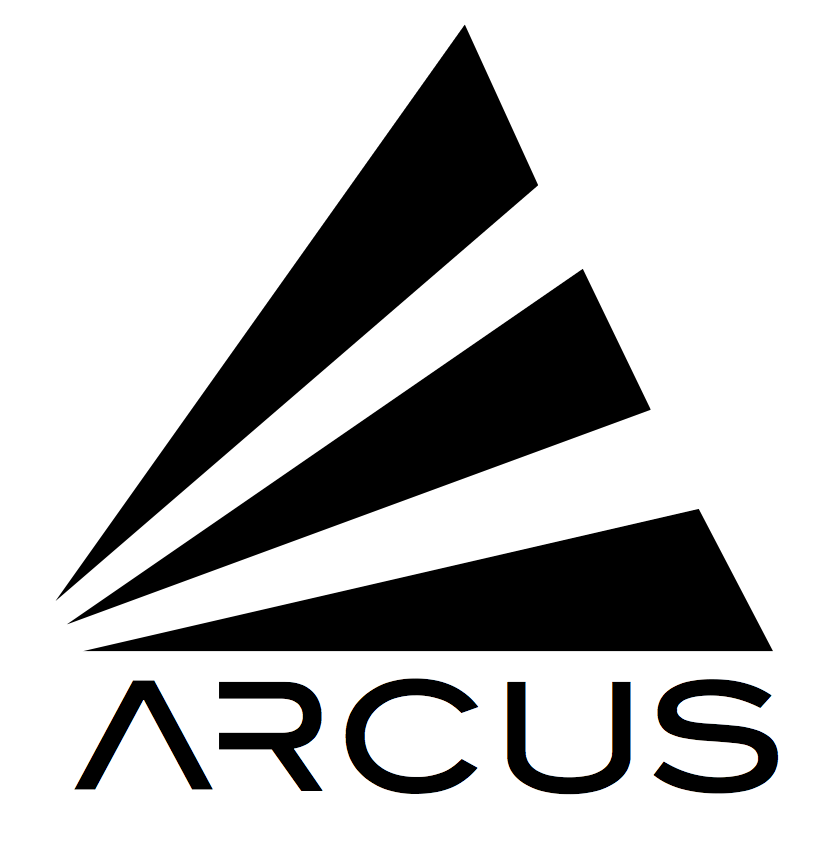

### Revision status: *preparation for Jan 2018 freeze*
Last revision in version control:

- Author: Hans Moritz Guenther <hgunther@mit.edu>
- commit 131fd945990e65ce1771be1d4937acf7382f7840
- Date:   Tue May 15 14:52:24 2018 -0400

**The version shown here is modified compared to the last commited revision.**

            

This document is git version controlled. The repository is available at https://github.com/hamogu/arcus.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev643 (commit hash: c7a3e480d6 from 2018-06-26)
- ARCUS python code version 0.0.dev153 (commit hash: 3d289c95aa from 2018-02-07)
- ARCUS CALDB version hash: 5590a73 (commited on 2018-05-15 )


In [2]:
from nbtemplate import display_header, display_codetoggle, get_path
display_header('Tolerances.ipynb', status='preparation for Jan 2018 freeze')

## Purpose

The purpose of this study is to estimate the effect of alignment errors on the key performance characteristics of Arcus: Spectral resolving power and effective area. These numbers can then be used to guide the decision how to build up an error budget that specifies the allowable alignment tolerances for individual components. Naturally, there will be a trade-of: If one parameter is set looser, that will generally mean that all the other alignment tolerances have to be smaller. Science requirements put limits on the maximal allowable degradation of spectral resolving power and effective area and engineering constraints determine how well e.g. individual SPOs can be aligned into petals, how well the petals can the aligned to the forward assembly, and how well the forward assembly can be aligned to the detector housing. In general, tighter tolerances require more work, time, and money. We thus need to understand how important each possible degree of freedom is to the total performance of the system to identify those where significant design and work needs to go into the alignment. It is beyond the scope of this document to "divy up" the total allowable tolerance to individual alignment steps; instead, this document presents the results of ray-trace calculations for many different scenarios of misalignments and thus provides input for a broader discussion between scientists, engineers, and project managers of how to handle alignment tolerances.

For some degrees of freedom in alignment only a ray-trace can really give the impact of misalignments, in other cases satisfactory estimates of the importance can be made analytically. Even in the second case, ray-trace calculations are a crucial cross-check, because they automatically take into account all possible effects, while analytical calculations often only consider the a first-order approximation.

It is worth mentioning, that the Arcus science would profit from an spectral resolving power or effective area above the defined minimum values for a baseline and threshold mission. For example, narrow absorption lines can be identified better with a higher spectral resolving power, potentially reducing the required observing time or making up for a loss in effective area. If technically feasible, the project will thus aim not to "use up" the entire misalignment budget, but to deliver a spectral resolving power above the minimum requirements.

## Approach

The simulations start from a perfectly aligned version of Arcus. Even this does not provide infinite resolving power, because this model already includes non-ideal effects that are not due to alignment, most notably, pointing jitter, which blurs the direction of the incoming photons, scatter on the SPO mirror surfaces, some astigmatism inherent in the design, and finite sizes of CAT gratings and CCD detectors, which means that they deviate from the ideal Rowland geometry. A ray-trace is run with this design and spectral resolving power ($R$) and effective area ($A_\mathrm{eff}$) are calculated.
After running the baseline version, one element of Arcus is shifted in one degree of freedom, e.g. all CCDs are shifted by 1 mm in the dispersion direction. The ray-trace is repeated, again $R$ and $A_\mathrm{eff}$ are calculated, then all CCDs are shifted by 2 mm and so on. After testing out the parameters space in dispersion direction, the CCDs will be shifted in cross-dispersion direction. In this way, each element (for example the CCD array), will be "misaligned" by various amounts in one of 6 degrees of freedom (shift along x, y, z, and rotation around x, y, z). In the first stage, only one degree of freedom is changed at a time, so there are no simulations where e.g. the CCD is misaligned in x, y, and z simultaneously. This is purely a computational limitation. Simulations are done for about 30 steps for each degree of freedom, which requires about $6*30=180$ simulations for the CCDs and similar numbers for SPOs, CAT gratings etc. Together, the first exploration where only one degree of freedom is varied at a time is based on several thousand simulations. If we wanted to explore the full 6-dimensional parameter space, we would need $30^6\approx10^9$ simulations for the CCDs alone.

For small tolerances it is not an unreasonable assumption that the misalignments in different degrees of freedom just add up and this can be used to build the total misalignment budget. Also, just looking at the results from the first stage, will identify some degrees of freedom where the alignment is easily (e.g. just from simple machining tolerances) much better than the requirements. In a second step, we can then run ray-traces where all degrees of freedom are varied according to the misalignment budget and thus check if the assumptions going into combining the misalignments in different degrees of freedom hold or if non-linear interactions degrade $R$ and $A_\mathrm{eff}$ more than expected. In this case, we need to revise the misalignment budget appropriately.

To keep the computational load reasonable, we simulate only one channel of Arcus. Since spectra from each channel will be extracted separately and there is symmetry between the channels, most results apply equally to all channels. We discuss in the text the few instances where the channel symmetry does not apply.
Each simulation consists of 200000 photons and the same source photons are used for each series of ray-traces, e.g. all global CCD misalignments use the same photons. 


## Step 1: Changing one parameter at the time

The next few sections present ray-trace results where one degree of freedom for an alignment is changed compared to the perfectly aligned Arcus model. 

### How to read the simulation results

In most cases, six plots are presented. The top row shows translations, the bottom row shows rotations. The first plot in each row is the translation in (or rotation around) the global telescope $x$-axis, the second plot is for the $y$-axis, and the last one for the $z$-axis. The global Arcus coordinate system is formally defined in two memos written separately by major study group 1 and Ed Hertz. In short, the $z$-axis is parallel to the optical axis, the $x$-axis is the grating dispersion direction and the $y$-axis is the cross-dispersion direction. A short description and sketch of this system can be found in the [Rowland Torus memo](http://space.mit.edu/home/guenther/ARCUS/RowlandGeometry.html). In general, rotations are not done around the origin of the coordinate system, but around the center of an element (e.g. the center of a SPO petal); this is described in detail for individual elements below.

Each figure shows the shift or rotation angle on the $x$-axis and then plots the spectral resolving power ($R$) with a solid line, the value for $R$ can be seen on the left $y$-axis of the figure. Overplotted is the effective area with dotted lines, the value can be seen on the right $y$-axis of the plot. Note that these effective areas are for *one channel only*, so the total Arcus effective area will be four times larger. The exact numbers for the effective area are subject to change as we continue to develop the ray-trace simulation, for example, currently, the simulation does not include obscuration by a thin hexagonal support mesh under the optical blocking filter. However, most of the missing effects are just an overall factor and the *relative* change in $A_\mathrm{eff}$ with increased misalignment is very robust.

Ray-tracing is performed for three different representative wavelength in the Arcus bandpass, shown as different colored lines on the plots.

When looking at the figures below, keep the following points in mind:

- Each simulation is done with 200000 photons, so some scatter due to Poisson noise is inevitable. For some axis, $R$ is essentially unchanged, so that the y axis range is chosen from e.g. 4600 to 4800. While the lines on the plot zig-zag between the top and the bottom, the real change in $R$ is only a few percent, entirely consistent with Poisson statistics.
- $A_\mathrm{eff}$ is given summed over all dispersed orders that fall on a CCD and $R$ is the average resolving power, where the resolving power from individual orders is averaged weighted by the number of photons in that particular order. Thus, it is possible, that $R$ in the plot increases with increasing misalignment if $A_\mathrm{eff}$ drops at the same time. This happens when an order with lower-than-average $R$ drops off the CCD (thus reducing the summed $A_\mathrm{eff}$ and increasing the average $R$). There is no scientific benefit from the apparently increased $R$ here - if one required a higher resolving power, the lower orders can be ignored in scientific analysis even if they fall on the CCD.
- Note that the zoom level for all axes (bottom, left, right) is chosen differently for each plot to highlight relevant features.

In the following sections, there are two different ways to apply misalignments. In the first case, we apply a deterministic change to all elements at once, e.g. we shift the entire SPO petal by 5 mm to the left. In the code, this is implemented by shifting each SPO in the petal by the same 5 mm in the same direction. In this frame, a global rotation would mean that the entire SPO petal is rotated rigidly by some angle, so that the SPOs in the center move very little, while the SPOs on the outside rotate with a larger lever arm. These calculations are are done for a range of negative and positive values and are shown with a **grey** background. In the second case, we apply misalignments to each element individually. For example, we move the SPOs within the (stationary) SPO petal. In this case, the actual change for each SPO is drawn from a Gaussian distribution centered on 0 and with a Gaussian $\sigma$ corresponding to e.g. 5 mm. The *average* misalignment of all SPOs will be close to 0 in this case, but they are all shifted relative to each other. These simulations are shown with **light pink** background.

In addition, there are a few plots with **light blue** background. These look at a loss of $R$ and $A_\mathrm{eff}$ from changing Arcus design parameters, which are not alignment tolerances but do contribute to the width of the observed line-spread function. While the default for all alignment tolerances is 0 (and their values are only different from 0 in the section explicitly discussing their contribution to loss in $R$ and $A_\mathrm{eff}$), the pointing jitter and the scatter from the SPOs (both in-plane and out-of-plane scatter) have non-zero default values. Both SPOs and star tracking system are not build by the Arcus team, but are supplied by other vendors. If all of these numbers were set to 0, Arcus in the simulations would reach very high values for $R$. As a consequence, even very minor misalignments in any axis would cause a significant (relative) drop in $R$, when in practice the alignment requirements are much more relaxed because of the width of the line spread function that is already introduced by the scatter from the SPOs.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.units as u

%matplotlib inline

In [4]:
det_glo = Table.read(os.path.join(get_path('tolerances'), 'detector_global.fits'))

Reading config file with path definitions: ['../site.cfg']


In [5]:
parlist = ['tx', 'ty', 'tz', 'rx', 'ry', 'rz']

def select_changed(table, par, parlist=parlist):
    pars = set(parlist)
    ind = np.ones(len(table), dtype=bool)
    for p in pars - set([par]):
        ind *= table[p] == 0
    return table[ind]

In [6]:
def plot_wiggle(tab, col, ax, axes_bkgcolor='w'):
    t = select_changed(tab, col, parlist)
    t.sort(col)
    t_wave = t.group_by('wave')
    axt = ax.twinx()
    
    for key, g in zip(t_wave.groups.keys, t_wave.groups):
        if col[0] == 't':
            x = g[col]
        elif col[0] == 'r':
            x = np.rad2deg(g[col].data)
        
        ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
        axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ [cm$^2$] (dotted lines)')
    if col[0] == 't':
        ax.set_xlabel('shift [mm]')
        ax.set_title('Shift along {}'.format(col[1]))
    elif col[0] == 'r':
        ax.set_xlabel('Rotation [degree]')
        ax.set_title('Rotation around {}'.format(col[1]))
    ax.set_axis_bgcolor(axes_bkgcolor)
    ax.set_axisbelow(True)
    ax.grid(axis='x', c='1.0', lw=2, ls='solid')
    #ax.set_xscale('symlog')
    
def load_plot(filename):
    tab = Table.read(os.path.join(get_path('tolerances'), filename))

    if 'global' in filename:
        axes_bkgcolor = '0.9'
    elif ('individual' in filename) or ('window' in filename):
        axes_bkgcolor = (1., 0.9, 0.9)
    else:
        axes_bkgcolor = 'w'
        
    fig = plt.figure(figsize=(12, 8))
    fig.subplots_adjust(wspace=.6, hspace=.3)
    for i, c in enumerate(parlist):
        ax = fig.add_subplot(2, 3, i + 1)
        plot_wiggle(tab, c, ax, axes_bkgcolor)
    
    return tab, fig

### Pointing jitter

Pointing jitter is not technically an alignment tolerance, but it affects the optical performance of Arcus in much the same way as misalignments between the optical components and it thus makes sense to treat it here. In this context, the "jitter" that matters is the uncertainty in the aspect solution, or, in other words, the difference between the true pointing direction and the tabulated pointing direction at the time of photon arrival. There are several reasons why the true pointing direction at the time of photon arrival might be unknown. They fall in two groups: First, the photon arrival time is only known within a certain time interval (the frame time). If the spacecraft moves between the beginning and the end of a frame, we cannot know where exactly it pointed when the photon arrived even if the spacecraft pointing was know perfectly all the time. To reduce this uncertainty, the spacecraft has to move slowly. Second, there are uncertainties to the instantaneous true pointing direction itself from e.g. fitting uncertainties for determining the centroids of the stars observed with the star tracker.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


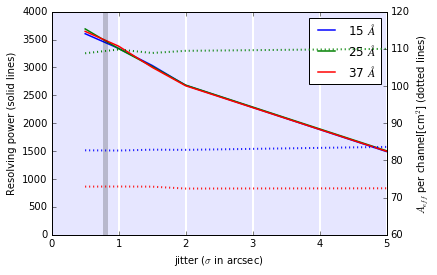

In [7]:
from arcus import jitter_sigma

t = Table.read(os.path.join(get_path('tolerances'), 'jitter.fits'))
fig = plt.figure()
ax = fig.add_subplot(111)
t.sort('Parameters')
t_wave = t.group_by('wave')
axt = ax.twinx()
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
    x = g['Parameters'].data
        
    ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
    axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
    ax.set_xlabel('jitter ($\sigma$ in arcsec)')

ax.set_axis_bgcolor((0.9, 0.9, 1.))
ax.set_axisbelow(True)
ax.grid(axis='x', c='1.0', lw=2, ls='solid')
ax.legend()
ax.set_xlim([0, 20])
jitsig = jitter_sigma.to(u.arcsec).value
out = ax.plot([jitsig, jitsig], list(ax.get_ylim()), 'k', alpha=0.2, lw=5)
out = ax.set_xlim(0, 5)

fig.savefig(os.path.join(get_path('figures'), 'alignjitter.pdf'), bbox_inches='tight') 

The figure shows how uncorrected jitter can quickly reduce the spectral resolving power if the pointing is not controlled to within about 1 arcsec. The gray bar marks the value for the jitter sigma that is used in all the misalignment simulations.

### Detectors / Misalignment between front and rear assembly

There are three main elements in Arcus: SPO petal, CAT grating petal, and camera. All that matters for the ray-trace is their *relative* position. Here, we show simulations where the entire focal plane is shifted or rotated. The center of rotation is the point between the two CCD arrays. This can happen if the camera is mounted with some misalignment in the rear assembly or equivalently, this can represent a misalignment between front and rear assembly, e.g. a twist in the boom. Thus, "shift along z" (top right plot) is a change in focus.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


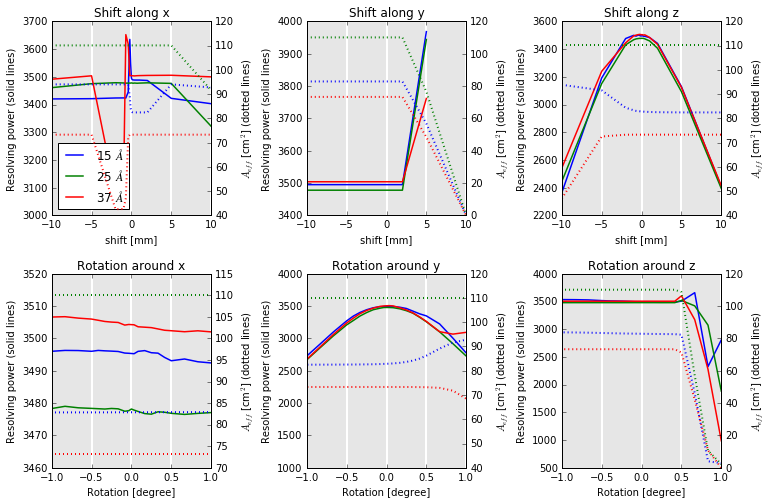

In [8]:
tab, fig = load_plot('detector_global.fits')
out = fig.axes[0].legend(loc='lower left')
    
for i in [6, 8, 10]:
    fig.axes[i].set_xlim(-1, 1)
    
fig.savefig(os.path.join(get_path('figures'), 'aligndet.pdf'), bbox_inches='tight') 

*Top row, discussed in order of importance, which is right to left*:
The plots show that the most important degree of freedom is a change in focus ("shift along z"). A shift along y is absolutely irrelevant, as long as it is small enough to keep the dispersed spectrum on the CCDs. For the particular channel simulated here that happens for y shifts for about -15 mm on one side and about +5 mm on the other side. A shift of 5 mm or more will drop at least one channel of the detector but in practice, this could be compensated by using offset pointing (placing the science target not on, but shifted with respect to the optical axis).

The curves for changing $R$ with shift in x (*top left*) show some spikes when an order hits a chip gap. For example, two orders contribute to the signal in the red curve. At -2 mm one of them hits a chip gap, causing a sudden drop in $A_\mathrm{eff}$ and also in $R$ ($R$ is averaged over all contributing orders, but only one order which happpens to have a lower $R$ is detected at this position). Note that chip gaps are inevitable. There will always be some wavelength in a chip gap. At 0 mm it might be $35\;\unicode{xC5}$, at -1 mm it is $36\;\unicode{xC5}$, and at -2 mm it is $37\;\unicode{xC5}$. The overall performance of the instrument averaged over a range of wavelengths is unaffected by this. Shift along does x matter in principle because the focal plane is curved. If the CCDs move in the dispersion direction, the spectrum will be slightly out of focus but the plot shows that shifts up to a few mm have little impact. This opens an additional possibility to mitigate the effect of chip gaps. In the current design, we have two sets of 8 CCDs, which are symmetrical with respect to the mid-plane of Arcus except for a small shift of a few mm, which means that the two channels from one pair of petals will have other chip gaps than the channels from the other pair of petals. In this configuration each pair of channels will have the chip gaps at the same wavelength. Based on the simulation here, we can additionally introduce a small offset, say 4 mm, in x-direction between the two channels of the same petal pair. That way, no two spectra will have chip gaps at that same position.

*Bottom row*: The bottom row shows the same phenomena as the top row. Rotation around the dispersion direction has little effect on $R$, rotation around z is only relevant once it becomes so large that the signal drops off the CCDs (about half a degree). Rotation around y (the cross-dispersion direction) is essentially the same as a defocus. This rotation makes the CCDs move up or down on a lever arm, causing the photons be the imaged at the wrong z position.

### CAT grating

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


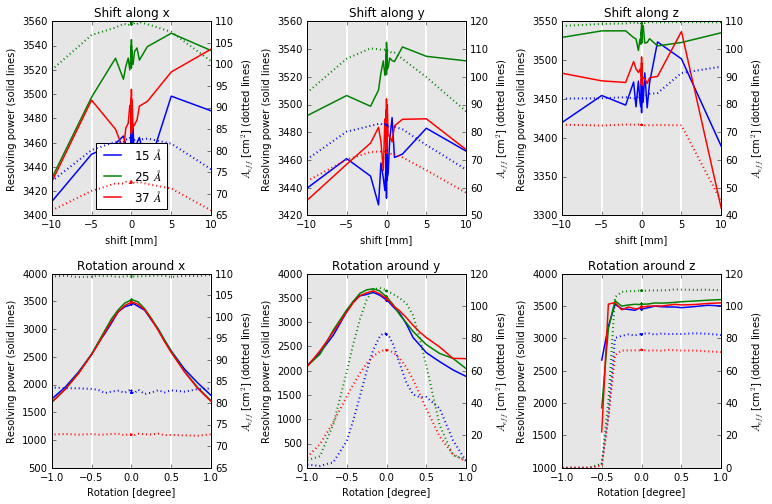

In [9]:
tab, fig = load_plot('CAT_global.fits')
    
leg = fig.axes[0].legend(loc='lower center')
    
for i in [6, 8, 10]:
    fig.axes[i].set_xlim(-1, 1)
    
fig.savefig(os.path.join(get_path('figures'), 'aligncatglobal.pdf'), bbox_inches='tight') 

This shows a change in the CAT grating petal position, while the SPO petal and the cameras are fixed. The petal is very robust to translations in any axis. Shifts in x and y move the petal almost tangential to the Rowland torus and thus changes of even a cm or two have little effect on $R$, $A_\mathrm{eff}$ only decreases because the gratings are carefully aligned under the petals and shifting destroys that alignment. A translation along the optical axis is essentially equivalent to choosing a Roland torus with a slightly smaller radius and that has little impact that long as the shift is small compared to the radius of the torus (6 m). The misalignment steps are chosen to densely sample the parameter space close to 0 and fewer simulations are done at larger shifts. In these plots, that are dominated by the Poisson scatter of the Monte-Carlo simulations, the lines look thus jittery close to 0, where many datapoints are located.

Rotations are calculated around the center of the CAT grating petal. Rotations around either x and y mean that the CAT gratings on one side move up, while the other side moves down changing the path length of the diffracted photons. Those photons coming from the high CAT gratings travel further along the dispersion direction than those from the low gratings, thus causing the dispersed spot to smear out, which reduces $R$. Rotation around z changes the direction of the dispersed light and for large angles, the dispersed orders miss the CCD.

The next plot looks at changes on the window level.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


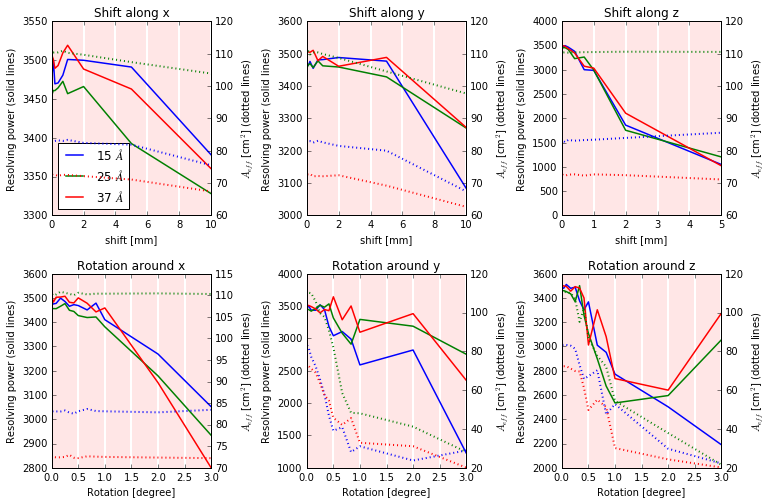

In [10]:
tab, fig = load_plot('CAT_window.fits')
    
leg = fig.axes[0].legend(loc='lower left')

out = fig.axes[4].set_xlim(0, 5)
fig.savefig(os.path.join(get_path('figures'), 'aligncatwindow.pdf'), bbox_inches='tight') 

The plot above shows misalignments of windows within the CAT grating petal, while all the individual CAT gratings are at their nominal positions with respect to the window center. Note that the plots for shift in x and y contain some unphysical space. For shifts larger than a few mm windows would overlap. In practice the window frames will prevent that, but in the simulation some photons go through two CAT gratings and get dispersed twice, and several spots appear confusing the algorithm that calculates $R$. Note that a shift along z  (the optical axis) of even 1 mm is a big problem here, while a shift of the entire petal is not. If only a few CAT gratings are shifted up or down, then the photons which are diffracted earlier (closer to the SPOs) are traveling a longer path and make it further along the dispersion direction than photons diffracted at the nominal position, thus smearing out the orders and reducing $R$.

Rotations around x and y have little effect on $R$ for angles below a degree or so. Since the facets have finite size, their edges differ from the Rowland torus by a little already, and adding a little more rotation does not change much. Rotations in y quickly reduce $A_\mathrm{eff}$ though, because the CCDs are placed for a certain blaze peak. Rotating the CAT gratings shifts the blaze peak and photons miss the CCDs. Rotation around z causes more and more signal to miss the detector. Unlike in the previous plot, there is no sharp cut-off, because the grating windows in the simulation have a distribution of rotation angles, and the larger the Gaussian $\sigma$ is, the more CAT gratings will send their dispersed photons to positions where they cannot be detected.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


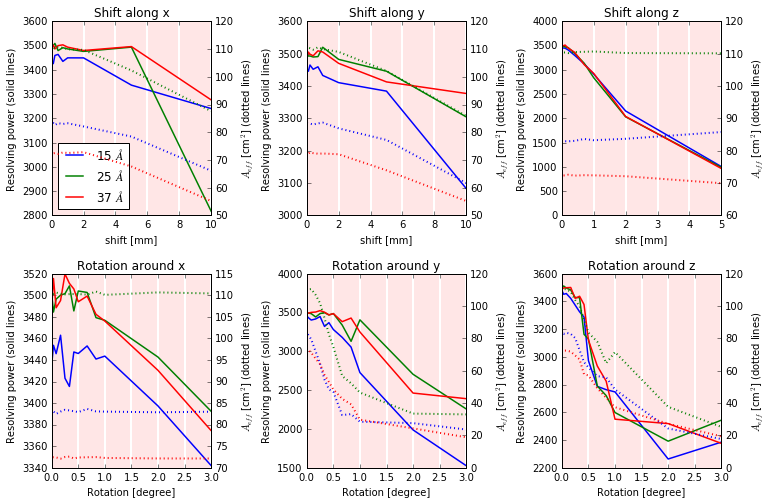

In [11]:
tab, fig = load_plot('CAT_individual.fits')
    
leg = fig.axes[0].legend(loc='lower left')

out = fig.axes[4].set_xlim(0, 5)
fig.savefig(os.path.join(get_path('figures'), 'aligncatindev.pdf'), bbox_inches='tight') 

This plot shows misalignment of CAT gratings with respect to the windows they are mounted to. It is very similar to the plot above, which shows misalignments of the windows with respect to the grating channel. What matters for the direction that a photons has after dispersion is the position and orientation of the CAT grating relative to the SPO. It is irrelevant if an misalignment is caused by the tolerance between CAT petal and window or between window and individual grating. The only difference is in rotations. In this plot, rotations are applied around the center of a CAT grating, while in the plot above, rotations are applied around the center of a window. Since windows are larger (they contain four or six CAT gratings), a rotation around the window center will move the edges of the CAT gratings more than a rotation around the center of each CAT gratings. Thus, the loss in $R$ is slightly higher in the previous plot than in this one.

Reading config file with path definitions: ['../site.cfg']


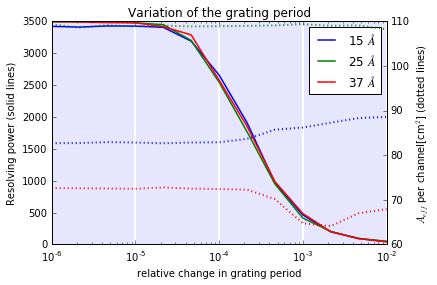

In [12]:
t = Table.read(os.path.join(get_path('tolerances'), 'CAT_period.fits'))
fig = plt.figure()
ax = fig.add_subplot(111)
t_wave = t.group_by('wave')
axt = ax.twinx()
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
    x = g['Parameters'].data[:, 1] / g['Parameters'].data[:, 0]
        
    ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
    axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
    ax.set_xlabel('relative change in grating period')

ax.set_axis_bgcolor((0.9, 0.9, 1.))
ax.set_axisbelow(True)
ax.grid(axis='x', c='1.0', lw=2, ls='solid')
ax.legend()
ax.set_xscale("log")
ax.set_title('Variation of the grating period')
out = ax.set_xlim([np.min(x), None])

This plot shows how a change in the grating constant leads to a loss of $R$. For each simulation, a grating period for each grating is drawn from a Gaussian distribution and the $\sigma$ values of that distribution are shown on the x-axis of the plot. Grating period variation is not important until it reaches about $5\times10^{-4}$ and beyond that point it quickly dominates all other terms that contribute to the width of the line spread function.

### CAT grating bar tilt angle
Beamline measurements of proto-type gratings show that the surfaces of the grating bars are not exactly perpendicular to the flat grating surface. The exact cause of this is under investigation; this could result from the grating fabrication or from the mounting on the grating frames. In either case, the result is that photons do not hit the side walls of the grating bars at the blaze angle that matches the ideal blaze condition, but with a small offset. The angle is not homogeneous over the grating surface and thus cannot be corrected for in mounting the frame. This simulation studies the impact of this uncertainty.

Reading config file with path definitions: ['../site.cfg']


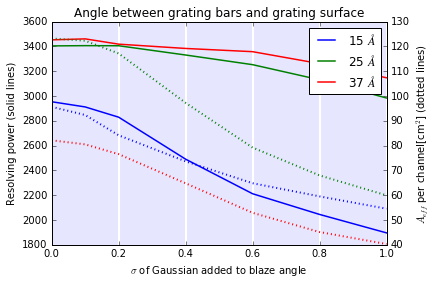

In [13]:
t = Table.read(os.path.join(get_path('tolerances'), 'CAT_flatness.fits'))
fig = plt.figure()
ax = fig.add_subplot(111)
t_wave = t.group_by('wave')
axt = ax.twinx()
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
    x = np.rad2deg(g['Parameters'].data)
    
    ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
    axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
    ax.set_xlabel('$\sigma$ of Gaussian added to blaze angle')

ax.set_axis_bgcolor((0.9, 0.9, 1.))
ax.set_axisbelow(True)
ax.grid(axis='x', c='1.0', lw=2, ls='solid')
ax.legend()
#ax.set_xscale("log")
out = ax.set_title('Angle between grating bars and grating surface')
#out = ax.set_xlim([np.min(x), None])

For the simulations in the plot above, a random angle drawn from a Gaussian distribution with a certain $\sigma$ is added to the blaze angle of each ray before the efficiency is looked up in the efficiency table. 

The plot shows loss of $R$ and loss of $A_\mathrm{eff}$ with increasing deviation from flatness. In principle, a small offset in the grating orientation does little to the overall grating efficiency. It does, however, redistribute the photons to different grating orders. In the Arcus design with only 8 CCDs, these orders may not be observed, since the CCD placement is optimized for a very specific blaze angle. Similarly, $R$ should in principle be unaffected by this change, but in practice, the redistribution of photons to different orders means that different orders contribute to the final $R$ value that is averaged over all observed orders, which can lead to lower $R$ overall.

Reading config file with path definitions: ['../site.cfg']


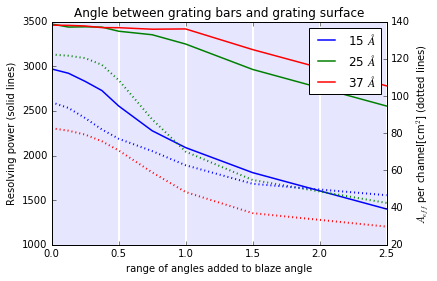

In [14]:
t = Table.read(os.path.join(get_path('tolerances'), 'CAT_buckeling.fits'))
fig = plt.figure()
ax = fig.add_subplot(111)
t_wave = t.group_by('wave')
axt = ax.twinx()
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
    x = np.rad2deg(g['Parameters'].data) / 2
    
    ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
    axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
    ax.set_xlabel('range of angles added to blaze angle')

ax.set_axis_bgcolor((0.9, 0.9, 1.))
ax.set_axisbelow(True)
ax.grid(axis='x', c='1.0', lw=2, ls='solid')
ax.legend()
#ax.set_xscale("log")
out = ax.set_title('Angle between grating bars and grating surface')
#out = ax.set_xlim([np.min(x), None])

This is very similar to the plot directly above, except that the random angle is not drawn from a Gaussian, but from a uniform distribution in the range [-x, x]. This representation was chosen to represent a buckeling. The grating bars sit on very thin L1 support structures, which in turn are supported by larger and most stable hexagons that make up the L2 support structure. If the grating bars and L1 structure sag, one might expect a mostly uniform distribution of angles.
Size of the effect and wavelength dependence are similar to the plot above.

Reading config file with path definitions: ['../site.cfg']


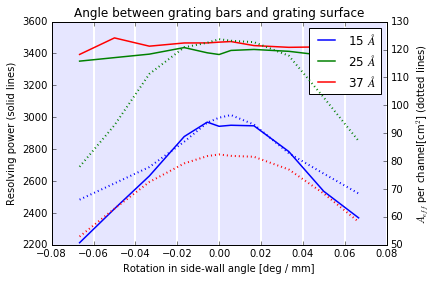

In [15]:
t = Table.read(os.path.join(get_path('tolerances'), 'blazegradient.fits'))
fig = plt.figure()
ax = fig.add_subplot(111)
t_wave = t.group_by('wave')
axt = ax.twinx()
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
    x = np.rad2deg(g['Parameters'].data)
    
    ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
    axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
    ax.set_xlabel('Rotation in side-wall angle [deg / mm]')

ax.set_axis_bgcolor((0.9, 0.9, 1.))
ax.set_axisbelow(True)
ax.grid(axis='x', c='1.0', lw=2, ls='solid')
ax.legend()
#ax.set_xscale("log")
out = ax.set_title('Angle between grating bars and grating surface')
#out = ax.set_xlim([np.min(x), None])

In practice, measurements indicate that the tilt angle of the grating bar side walls is not randomly distributed, but seems to be an almost linear function of the position on the CAT grating. (Change is only seen along the dispersion direction, not perpendicular to it). These simulations assume that the grating bar orientation is nominal at the center of the grating and changes linearly from left to right. For example, if the angle of the grating bars is -.5 deg on one side and +.5 deg on the other side and the grating is 30 mm wide, then the rotation in this plot is 0.033 deg / mm.

Performance is best for flat gratings, but even for considerable change the grating bar orientation, $R$ remains unchanged at long wavelength. This is understandable because the change the bar tilt angle does not reduce the $R$ of an individual order, it simply distributes photons to other orders. If these orders are outside of the CCDs, the effective area is reduced, the $R$ remains unchanged. In contrast, for smaller wavelength, $R$ drops, because orders with lower resolving power (e.g. the first order) do contributed to the averaged resolving power here.

Note that the peak of the distribution is not at zero. Because the CAT gratings are placed in a converging beam, the blaze angle for photons on the edges differs from the nominal blaze angle in the center of the gratings. A slight tilt in the grating bars can correct for that. For the Arcus focal length, the rotation should be $\arcsin(26/10000) / 26 \mathrm{mm} = 0.006$ deg / mm.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


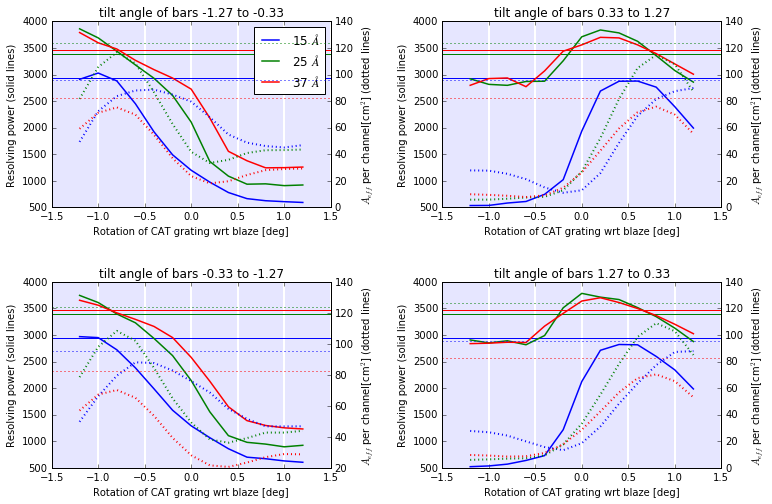

In [16]:
# defined in the tolerances parameters driver script
blaze_params = [(0.036, -0.8), (0.036, 0.8), (-0.036, -0.8), (-0.036, 0.8)]
t0 = Table.read(os.path.join(get_path('tolerances'), 'blazegradient.fits'))
t0_wave = t0.group_by('wave')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    ax = axes.flatten()[i]
    t = Table.read(os.path.join(get_path('tolerances'), 'CAT_blaze_detail{}.fits'.format(i)))
    t_wave = t.group_by('wave')
    axt = ax.twinx()
    
    for key, g, g0, offset in zip(t_wave.groups.keys, t_wave.groups, t0_wave.groups, [-.3, 0. , .3]):
        x = np.rad2deg(g['ry'])
    
        line = ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
        axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
        # Find point closest to 0
        ind = g0['Parameters'] == np.min(np.abs(g0['Parameters']))
        ax.plot([-1.5, 1.5], [g0['Rgrat'][ind]] * 2, color=line[0].get_color(), label='__no_legend__')
        axt.plot([-1.5, 1.5], [g0['Aeffgrat'][ind]] * 2, ':', color=line[0].get_color())
        #ax.plot([offset], g0['Rgrat'][ind], 'o', color=line[0].get_color(), mec=line[0].get_color(), 
        #        ms=10, mew=3, label='__no_legend__')
        #axt.plot([offset], g0['Aeffgrat'][ind], 's', color=line[0].get_color(), ms=10, mew=3, fillstyle='none')
        ax.set_ylabel('Resolving power (solid lines)')
        axt.set_ylabel('$A_{eff}$ per channel[cm$^2$] (dotted lines)')
        ax.set_xlabel('Rotation of CAT grating wrt blaze [deg]')

    ax.set_axis_bgcolor((0.9, 0.9, 1.))
    ax.set_axisbelow(True)
    ax.grid(axis='x', c='1.0', lw=2, ls='solid')
    #ax.legend()
    #ax.set_xscale("log")
    out = ax.set_title('tilt angle of bars {:4.2f} to {:4.2f}'.format(blaze_params[i][1] - 13. * blaze_params[i][0], 
                                                            blaze_params[i][1] + 13. * blaze_params[i][0]))
#out = ax.set_xlim([np.min(x), None])
out = axes[0,0].legend()
out = fig.subplots_adjust(hspace=0.4, wspace=0.4)

The plot above is tweaked to study specific parameters for the grating bar tilt angle, where numbers are chosen to match a specific grating that was measured in the lab. More specifically, the particular grating measured is the most extreme example of grating bar tilt angle that we have looked at so far. So, assuming that all of Arcus has gratings with these characteristics is certainly a conservative estimate. In this particular grating, the bar tilt angle at the grating center is $0.8^\circ$ (or, if the grating is flipped so that the light shines on the opposite site $-0.8^\circ$) and the gradient of the tilt angle is 0.036 deg/mm (or -0.036 deg/mm if left and right are flipped). Given the two axes we can flip around, gives us four possibilities to mount the gratings. Each subplot presents one such choice.

Arcus is designed for a blaze angle of $1.8^\circ$, so if the grating bar tilt angle varies e.g. from $-1.27^\circ$ to $-0.33^\circ$ with respect to nominal, then the blaze angles of the photons will be in the range $1.8-1.27 \approx 0.5$ to $1.8-0.33\approx1.5$ deg, far outside the designed range. This could potentially be compensated by adjusting the orientation of the CAT gratings as they are mounted. The mount angle with respect to the default Arcus design is shown on the x-axis. For example, the effective area at $25\;\unicode{xC5}$ (dotted green line) in the top left image peaks around $-0.8^\circ$, which is the mounting that exactly compensates the tilt at the center of the gratings. 

All plots also show as thin, horizontal lines the $R$ and $A_\mathrm{eff}$ values we expect from a nominal Arcus design where all grating bars are parallel to each other and exactly perpendicular to the grating surface for comparison. In general, the best $A_\mathrm{eff}$ values (dotted lines) obtained in the simulations shown in this figure are close, but a little below, the values obtained with no grating bar tilt angle, when the CAT gratings are rotated to compensate for the grating bar tilt angle at the grating center. Still, $A_\mathrm{eff}$ is a little lower, because even in this case the blaze angles for photons that arrive close to the edges of the gratings are different from nominal and thus a larger fraction of the photons is diffracted into orders that are not covered with CCD detectors. In some cases, e.g. towards the left in the top left plot, $R$ is actually higher than in the nominal Arcus. This is because the $R$ plotted is the average resolving power over all observed grating orders, weighted by the signal received in this order. If fewer photons arrive at low orders, then $R$ can be higher. Note that this is not a real advantage for observations, as the observer could always choose to concentrate on the higher orders only.

The top and bottom plots on the left are very similar to each other and so are the top and bottom plots in the right column. In the top row, the grating bar tilt angle increases from one side to the other, in the bottom row it decreases, but with the same offset in the grating center. This gives very similar results. As pointed out before, in principle one of these orientations is slightly better than the other because the CAT gratings sit in a converging beam, but this effect is almost negligible compared to the changes in blaze from left to right due to the grating bar tilt angle.

In summary, a grating bar tilt angle that changes from one side to the other on the grating will reduce Arcus performance. If the grating bar tilt at the center of the grating is not zero, then mounting the gratings to compensate for that will recover most of the performance.




### SPOs

The SPO model used in MARXS raytracing is fairly simple (just a perfect mirror with additional in-plane and out-of-plane scatter) but it works well for on-axis sources and small angles. For large angles (many arcminutes) vignetting becomes important and the size of the PSF increases. Both effects are not included in these simulations. However, the results for translations should be robust and the results for rotations should be good for small angles.

Reading config file with path definitions: ['../site.cfg']


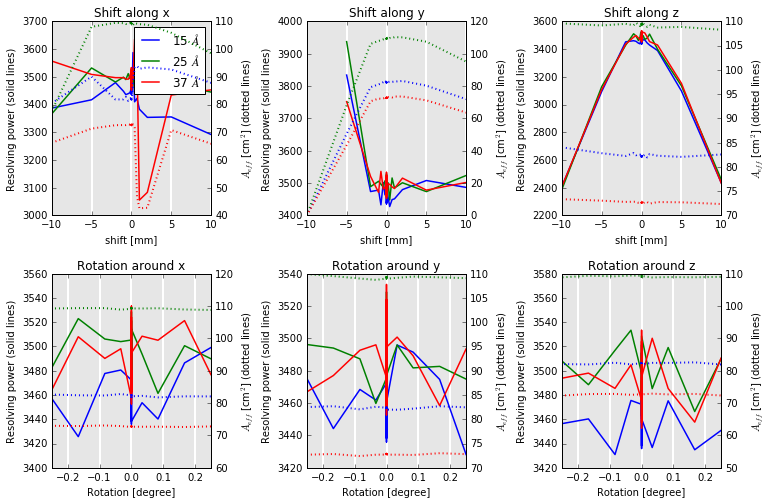

In [17]:
tab, fig = load_plot('SPOs_global.fits')
    
leg = fig.axes[0].legend()
for i in [6, 8, 10]:
    fig.axes[i].set_xlim(-.25, .25)

Shifting the SPO petal along the dispersion direction has little effect. Essentially, it just shifts the entire detector image. Shifts along y do even less to $R$ and $A_\mathrm{eff}$, as long as the signal is not shifted so far that it falls off the detector. Shifts along z are similar to changing the focus as discussed above, and the plots look very similar.
Rotations of the SPO petal for small angles are not very important either, for angles larger than a several arcminutes simulations that treat the SPOs in more detail are required in particular to estimate $A_\mathrm{eff}$.

Reading config file with path definitions: ['../site.cfg']


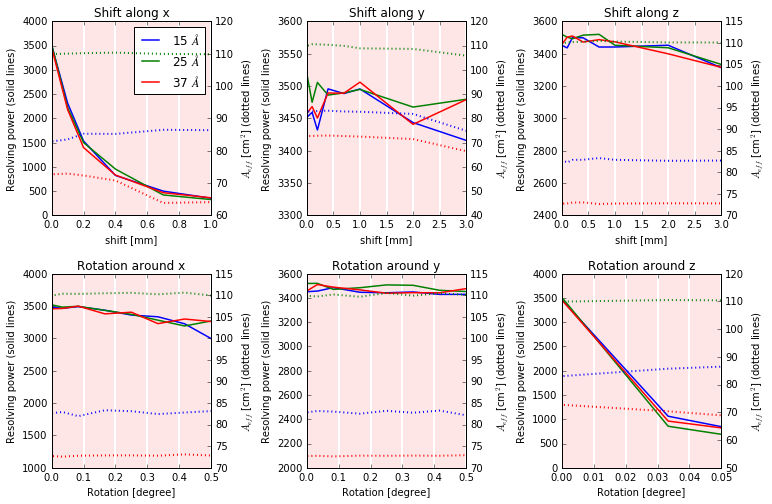

In [18]:
tab, fig = load_plot('SPOs_individual.fits')
    
leg = fig.axes[0].legend()
fig.axes[0].set_xlim(0, 1)
for i in [2, 4]:
    fig.axes[i].set_xlim(0, 3)
for i in [6, 8]:
    fig.axes[i].set_xlim(0, .5)
out = fig.axes[10].set_xlim(0, .05)

Alignment technology for SPOs within a petal is not just the responsibility of Arcus, as similar technologies are needed for ESA's Athena mission. As such, much research and development has gone into aligning SPOs. We shows these plots here mostly for completeness and for comparison with the tolerances calculated for the other components.

This plot shows misalignments between individual SPOs and has some of the tightest margins in the entire design. In particular, shifts in x (the dispersion direction) translate directly into more fuzzy dispersed orders. Even a misalignment of only 0.1 mm shifts the signal on the detector by several pixels and reduces $R$ quickly. Similarly, rotations around z shift the optical axis for this particular SPO from the nominal value. Since some SPOs are located more than 80 cm from the optical axis, even small rotations quickly broaden the image on the detector.

INFO:root:Loading data from gratings/debyewaller
INFO:root:Loading data from gratings/debyewaller
INFO:root:Loading data from gratings/facets
INFO:root:Loading data from gratings/facets
INFO:root:Loading data from gratings/facets
INFO:root:Loading data from gratings/facets
INFO:root:Loading data from filters/sifilter
INFO:root:Loading data from filters/opticalblocking
INFO:root:Loading data from filters/uvblocking
INFO:root:Loading data from detectors/contam
INFO:root:Loading data from detectors/qe


Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


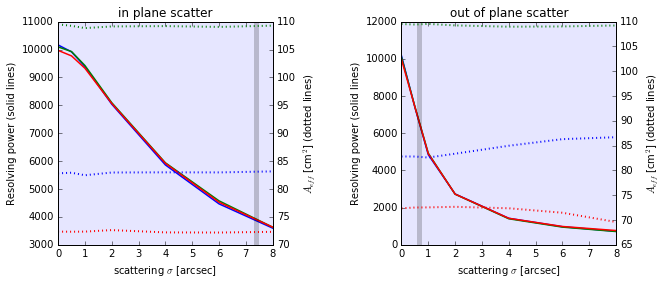

In [19]:
def plot_scat(tab, col, ax, axes_bkgcolor='w'):
    t = select_changed(tab, col, parlist=['inplanescatter', 'perpplanescatter'])
    t.sort(col)
    t_wave = t.group_by('wave')
    axt = ax.twinx()
    
    for key, g in zip(t_wave.groups.keys, t_wave.groups):
        x = np.rad2deg(g[col].data) * 3600.
        
        ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
        axt.plot(x, g['Aeffgrat'], ':', label='{:2.0f} $\AA$'.format(key[0]), lw=2)
    ax.set_ylabel('Resolving power (solid lines)')
    axt.set_ylabel('$A_{eff}$ [cm$^2$] (dotted lines)')
    if col[0] == 't':
        ax.set_xlabel('shift [mm]')
        ax.set_title('Shift along {}'.format(col[1]))
    elif col[0] == 'r':
        ax.set_xlabel('Rotation [degree]')
        ax.set_title('Rotation around {}'.format(col[1]))
    ax.set_axis_bgcolor(axes_bkgcolor)
    ax.set_axisbelow(True)

from arcus import Arcus
from arcus.spo import ScatterPerChannel
arc = Arcus()
    
tab = Table.read(os.path.join(get_path('tolerances'), 'scatter.fits'))

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(wspace=.6, hspace=.3)
for i, c in enumerate(['inplanescatter', 'perpplanescatter']):
    ax = fig.add_subplot(1, 2, i + 1)
    plot_scat(tab, c, ax, (0.9, .9, 1))
    ax.set_xlabel('scattering $\sigma$ [arcsec]')
    ax.set_title(['in plane scatter','out of plane scatter'][i])
    scat = np.rad2deg(getattr(arc.elements[1].elements[1], c)) * 3600.
    ax.plot([scat, scat], list(ax.get_ylim()), 'k', alpha=0.2, lw=5)
    
fig.savefig(os.path.join(get_path('figures'), 'alignscatter.pdf'), bbox_inches='tight') 

As the last step in this section, we examine the importance of the scatter in the SPOs. This scatter comes from surface figure errors or particulates on the SPO surface. The Marxs simulation does not model the shape of an SPO in 3D, instead, it uses a simplified model that treats each SPO module as a thin lens with perfect imaging quality. It then adds scatter in the plane of reflection and out of the plane of reflection. The magnitude of this scatter is matched to observed quantities for SPOs that have been manufactured and measured in the laboratory. For each photon, in plane and out of plane scatter is drawn from a Gaussian distribution with a given $\sigma$. For the plots above, simulations are done for different values for the in plane and out of plane scatter; the out of plane scatter was set to 0 for the simulations shown in the left plot, and the in plane scatter was set to 0 for the simulations shown in the right plot. For perfect mirrors, the maximum $R$ is about 10000; this number is limited by the pointing jitter that is included in these simulations (see above) and also by the finite size of the grating facets, which deviate from the ideal mathematical Rowland torus.

Gray bars in each plot mark the fiducial $\sigma$ for the scatter that is included in all the other simulations shown in this memo. From the left plot, we can see that $R$ for Arcus in general is limited by the size of the in plane scatter and any improvement of this quantity will also improve the overall $R$, at least until other effects and misalignments become dominant.

(Note that instead of a Gaussian $\sigma$, people often also quote the full width at half maximum (FWHM) of the Point-spread-function (PSF) or half-energy width (HEW).)

## Step 2: Alignment budget

In this step, all possible alignment tolerances are varied at the same time according to the alignment budget developed by R. Smith, where the numbers in the budget are decided as a trade-off between engineering requirements, cost, and the acceptable loss of $R$ and effective area. The alignment budget assumes that all alignment tolerances contribute independently and the simulations here are designed to check this assumption. Some misalignments might cancel out in practice, others might have a multiplicative effect. Full ray-tracing is the best way to check that and to predict final instrument performance.

In [20]:
from copy import deepcopy
import arcus

align = deepcopy(arcus.arcus.align_requirement_smith)
arcus.arcus.reformat_randall_errorbudget(align, globalfac=1)

In [21]:
aligndat = np.array([a[3] for a in align])
talign = Table([[a[4] for a in align]], names=['alignment'])
for i, col in enumerate(['trans x', 'trans y', 'trans z']):
    talign[col] = aligndat[:, i]
    talign[col].unit = u.mm
    talign[col].format = '{:5.3f}'
    
for i, col in enumerate(['rot x', 'rot y', 'rot z']):
    talign[col] = np.rad2deg(aligndat[:, i + 3]) * 3600
    talign[col].unit = u.arcsec
    talign[col].format = '{:5.0f}'
talign

alignment,trans x,trans y,trans z,rot x,rot y,rot z
,mm,mm,mm,arcsec,arcsec,arcsec
str27,float64,float64,float64,float64,float64,float64
individual SPO in petal,0.004,0.033,0.017,100,100,3
SPO petal to front assembly,0.000,0.000,0.000,0,0,0
CAT petal to SPO petal,0.333,0.333,0.333,100,100,200
CAT windows to CAT petal,0.333,0.333,0.067,100,60,100
individual CAT to window,0.333,0.333,0.067,100,60,100
Camera to front assembly,1.667,0.667,0.333,60,60,60


In [22]:
import sys
talign.write(sys.stdout, format='ascii.latex')

\begin{table}
\begin{tabular}{ccccccc}
alignment & trans x & trans y & trans z & rot x & rot y & rot z \\
 & $\mathrm{mm}$ & $\mathrm{mm}$ & $\mathrm{mm}$ & $\mathrm{{}^{\prime\prime}}$ & $\mathrm{{}^{\prime\prime}}$ & $\mathrm{{}^{\prime\prime}}$ \\
individual SPO in petal & 0.004 & 0.033 & 0.017 & 100 & 100 & 3 \\
SPO petal to front assembly & 0.000 & 0.000 & 0.000 & 0 & 0 & 0 \\
CAT petal to SPO petal & 0.333 & 0.333 & 0.333 & 100 & 100 & 200 \\
CAT windows to CAT petal & 0.333 & 0.333 & 0.067 & 100 & 60 & 100 \\
individual CAT to window & 0.333 & 0.333 & 0.067 & 100 & 60 & 100 \\
Camera to front assembly & 1.667 & 0.667 & 0.333 & 60 & 60 & 60 \\
\end{tabular}
\end{table}


The table above summarizes the $1\sigma$ tolerances of the baseline alignment budget. Note that there is no error given for the alignment of the SPO petal to the front assembly because the position of the SPO petal is defined to be the base orientation. The CAT grating petal and the camera in the rear assembly are measured with respect to the SPO petal position.

In [23]:
tbase = Table.read(os.path.join(get_path('tolerances'), 'baseline_budget.fits'))

Reading config file with path definitions: ['../site.cfg']


Reading config file with path definitions: ['../site.cfg']


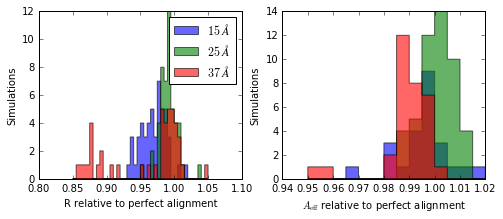

In [24]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
axa = fig.add_subplot(122)

waves = list(set(tbase['wave']))
waves.sort()

for i, wave in enumerate(waves):
    tw = tbase[tbase['wave'] == wave]
    ax.hist(tw['Rgrat'][1:] / tw['Rgrat'][0], label='${:2.0f}\;\AA$'.format(wave), 
            histtype='stepfilled',
            alpha=0.6, bins=np.arange(.85, 1.051, .005))
    axa.hist(tw['Aeffgrat'][1:] / tw['Aeffgrat'][0], label='${:2.0f}\;\AA$'.format(wave), 
            histtype='stepfilled',
            alpha=0.6, bins=np.arange(.95, 1.021, .005))
    
ax.set_xlabel('R relative to perfect alignment')
ax.set_ylabel('Simulations')

axa.set_xlabel('$A_\mathrm{eff}$ relative to perfect alignment')
axa.set_ylabel('Simulations')
out = ax.legend()

fig.savefig(os.path.join(get_path('figures'), 'alignbudget.pdf'), bbox_inches='tight') 

There are two sources of uncertainty in predicting how much $R$ and $A_\mathrm{eff}$ change compared to the baseline for a set of alignment tolerances. First, ray-tracing is a Monte-Carlo simulation with a finite number of rays. It is thus always possible, that the signal in one run is narrower than in the baseline scenario just by chance. Second, misalignments are statistical. For each element they are drawn from a Gaussian distribution. Thus, the predicted $R$ and $A_\mathrm{eff}$ vary from simulation to simulation. The plots above show how $R$ and $A_\mathrm{eff}$ change for the baseline alignment tolerances for the three wavelengths that are used throughout this document. On average, $R$ is reduced by about 2% relative to the baseline; indicating that the alignment budget is unlikely to degrade the performance significantly. However, there is a finite probability to loose more than 10% of $R$ for unlucky scenarios.
$A_\mathrm{eff}$ stays essentially unchanged in all simulations, as we also know from the analysis in Step 1.

Differences are visible between the different wavelengths. At $37\;\unicode{xC5}$ two dispersed orders (order 3 and 4) contribute, but order three is close to the edge of a CCD and order 4 is close to a chip gap. If either one is lost, $R$ or $A_\mathrm{eff}$ will suffer. In contrast, the signal at $25\;\unicode{xC5}$ is dominated by order 6, comfortably in the middle of a CCD. Thus, the two plots above should not be interpreted as "longer wavelength will suffer more"; crucial orders are close to a chip gap in different spots over the Arcus bandpass. Instead, the plots should be read as showing the range of effects that the baseline misalignment can have on $R$ and $A_\mathrm{eff}$, depending on what exactly the random numbers are that are drawn.

## Summary

In this memo, we analyze all variable contributors to the Arcus performance. Some effects are set by the design or the finite size of components, and these were not treated. We looked at pointing jitter, SPO scatter, and grating constant variation as well as the alignment tolerances for SPO petals, SPOs to the petal, CAT petals, CAT windows to the petal, and CAT gratings to the windows, as well as front to rear assembly (camera). Based on these numbers, an alignment budget can be chosen, and in a second step we performed ray-traces with the Arcus design alignment budget and calculated the impact on resolving power and effective area.

In [25]:
display_codetoggle()

## Appendix: Plots with detailed formatting

The plots in the analysis above are optimized for display on a computer screen. In this appendix, some of the data is replotted with different formatting (aspect ratio of plot, font size of labels etc.) optimized for inclusion of the resulting plots into print publication or slide show.

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


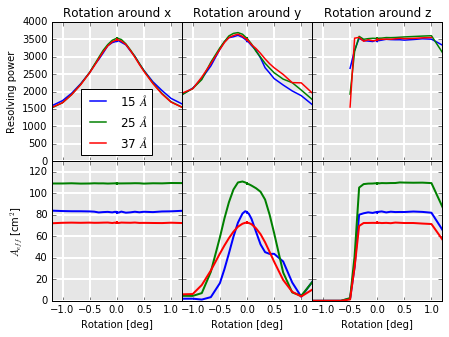

In [26]:
def plot_wiggle_separate(tab, col, ax, axt, axes_bkgcolor='w'):
    t = select_changed(tab, col, parlist)
    t.sort(col)
    t_wave = t.group_by('wave')  
    for key, g in zip(t_wave.groups.keys, t_wave.groups):
        if col[0] == 't':
            x = g[col]
        elif col[0] == 'r':
            x = np.rad2deg(g[col].data)
        
        ax.plot(x, g['Rgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=1.5)
        axt.plot(x, g['Aeffgrat'], label='{:2.0f} $\AA$'.format(key[0]), lw=2)

    axt.set_xlabel('Rotation [deg]')
    ax.set_title('Rotation around {}'.format(col[1]))
    ax.set_axis_bgcolor(axes_bkgcolor)
    ax.set_axisbelow(True)
    ax.grid(axis='both', c='1.0', lw=2, ls='solid')
    axt.set_axis_bgcolor(axes_bkgcolor)
    axt.set_axisbelow(True)
    axt.grid(axis='both', c='1.0', lw=2, ls='solid')

tab = Table.read(os.path.join(get_path('tolerances'), 'CAT_global.fits'))

axes_bkgcolor = '0.9'
       
fig = plt.figure(figsize=(7, 5))
fig.subplots_adjust(wspace=0, hspace=0)

axx = fig.add_subplot(2, 3, 1)
axy = fig.add_subplot(2, 3, 2, sharex=axx, sharey=axx)
axz = fig.add_subplot(2, 3, 3, sharex=axx, sharey=axx)
atx = fig.add_subplot(2, 3, 4, sharex=axx)
aty = fig.add_subplot(2, 3, 5, sharex=axx, sharey=atx)
atz = fig.add_subplot(2, 3, 6, sharex=axx, sharey=atx)
axes = [axx, axy, axz, atx, aty, atz]

for i, c in enumerate(['rx', 'ry', 'rz']):
        plot_wiggle_separate(tab, c, axes[i], axes[i+3], axes_bkgcolor)
    

leg = fig.axes[0].legend(loc='lower center')
    
axx.set_xlim(-1.2, 1.2)
atx.set_ylim(0, 130)
axx.set_ylabel('Resolving power')
atx.set_ylabel('$A_{eff}$ [cm$^2$]')

for i in [1,2,4,5]:
    axes[i].tick_params(labelleft='off')  
for i in [0, 1, 2]:
    axes[i].tick_params(labelbottom='off') 

fig.savefig(os.path.join(get_path('figures'), 'CATalignmentforCSR.png'), dpi=600, bbox_inches='tight')    

Reading config file with path definitions: ['../site.cfg']
Reading config file with path definitions: ['../site.cfg']


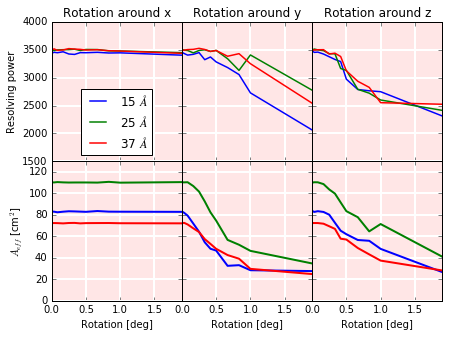

In [27]:
tab = Table.read(os.path.join(get_path('tolerances'), 'CAT_individual.fits'))

axes_bkgcolor = (1., 0.9, 0.9)
       
fig = plt.figure(figsize=(7, 5))
fig.subplots_adjust(wspace=0, hspace=0)

axx = fig.add_subplot(2, 3, 1)
axy = fig.add_subplot(2, 3, 2, sharex=axx, sharey=axx)
axz = fig.add_subplot(2, 3, 3, sharex=axx, sharey=axx)
atx = fig.add_subplot(2, 3, 4, sharex=axx)
aty = fig.add_subplot(2, 3, 5, sharex=axx, sharey=atx)
atz = fig.add_subplot(2, 3, 6, sharex=axx, sharey=atx)
axes = [axx, axy, axz, atx, aty, atz]

for i, c in enumerate(['rx', 'ry', 'rz']):
        plot_wiggle_separate(tab, c, axes[i], axes[i+3], axes_bkgcolor)
    

leg = fig.axes[0].legend(loc='lower center')
    
axx.set_xlim(0, 1.9)
atx.set_ylim(0, 130)
axx.set_ylabel('Resolving power')
atx.set_ylabel('$A_{eff}$ [cm$^2$]')

for i in [1,2,4,5]:
    axes[i].tick_params(labelleft='off')
for i in [0, 1, 2]:
    axes[i].tick_params(labelbottom='off') 

fig.savefig(os.path.join(get_path('figures'), 'CATalignmentforSPIE.png'), dpi=600, bbox_inches='tight') 